# Сравнительный анализ тарифных планов "Смарт" и "Ультра" оператора "Магалайн

    Цель: Определить выгодный тарифный план для корректировки рекламного бюджета.
    Выборка. Данные 500 пользователей тарифных планов «Смарт» и «Ультра»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год.
    Примечание: «Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [267]:
# Импортируем необходимые для разветовательного и статистического анализа данных библиотеки 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy as sp
import scipy.stats as stats

In [268]:
# Загрузим датасеты с информацией о длительности звонков, потребленного интернет-трафика, кол-ва смс, инф-ю о тарифных планах и
# пользователях. Настроим для удобства дальнейшего анализа в таблице с тарифными планами столбец с индексом.
df_calls = pd.read_csv('https://code.s3.yandex.net/datasets/calls.csv')
df_internet = pd.read_csv('https://code.s3.yandex.net/datasets/internet.csv')
df_messages = pd.read_csv('https://code.s3.yandex.net/datasets/messages.csv')
df_tariffs = pd.read_csv('https://code.s3.yandex.net/datasets/tariffs.csv', index_col = 'tariff_name')
df_users = pd.read_csv('https://code.s3.yandex.net/datasets/users.csv')

Так как датасетов 5, прочтем каждый из них в отдельности: выведем информацию описательные характеристики структуры данных и первые 5 строк файлов. Приступим к описательному анализу данных. 

In [269]:
df_calls.info()
display(df_calls.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [270]:
#Проверим наличие пропусков 
df_calls.isna().sum()

id           0
call_date    0
duration     0
user_id      0
dtype: int64

In [271]:
#Проверим наличие дубликатов
df_calls.duplicated().sum()

0

In [272]:
df_internet.info()
display(df_internet.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [273]:
#Проверим наличие пропусков
df_internet.isna().sum()

Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

In [274]:
#Проверим наличие дубликатов
df_internet.duplicated().sum()

0

In [275]:
df_messages.info()
display(df_messages.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [276]:
#Проверим наличие пропусков
df_messages.isna().sum()

id              0
message_date    0
user_id         0
dtype: int64

In [277]:
#Проверим наличие дубликатов 
df_messages.duplicated().sum()

0

In [278]:
#Выведем информацию с описание тарифных планов (абонентской платы, лимитов услуг, включенных в стоимость, стоимости услуг сверх лимита)
df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
tariff_name,,,,,,,
smart,50,15360,500,550,200,3,3
ultra,1000,30720,3000,1950,150,1,1


In [279]:
df_users.info()
display(df_users.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [280]:
#Проверим налаичие / количество пропущенных значений
df_users.isna().sum()

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

In [281]:
#Проверим наличие дубликатов
df_users.duplicated().sum()

0

    Данные представляют собой выборку из 500 пользователей двух тарифных планов "Смарт" и "Ультра" оператора "Мегалайн". В датасетах представлена информация о "поведении" пользователей: на сколько минут и в какую дату были совершены звонки, какой объем трафика был использован в каждую сессию в определенную дату, данные об отправленных смс по конкретным датам. Каждому "лиду" присовен уникальный идентификационный номер "сессии" услуги. Информация представлена в срезе 12 месяцев 2018 года. 

    Датасеты неравномерны по объему (т.е. количество строк отличается) - это косвенно означает, что количество пользователей обоих тарифных планов, воспользовавшихся той или иной услугой оператора в месяц отличается (однако, этот поинт требует проверки). Переменные с датами каждой сессии, датой регистрации тарифного плана и датой окончания пользования тарифным планом записаны с ошибкой - необходимо прибегнуть к приведению типов (к Datetime64)

    Во всех датасетах, кроме данных с характеристиками пользователей, отсутствуют пропущенные значения и дубликаты. В датасете с информацией о пользователях (город, ФИО, тарифный план и т.д.) есть пропущенные значения переменной - даты завершения пользования тарифным планом. В данных пропущенные значения этой переменной означают, что абонент на этапе сбора данных еще является пользователем тарифного плана, если же дата указана, то мы абонент уже не является пользователем того или иного тарифного плана. Мы можем утверждать, что всего 38 пользователей из 500 "ушли" от оператора (характеристика оттока).

In [282]:
# Проверим количество уникальных пользовательских данных о звонках за 12 месяцев
df_calls.nunique()

id           202607
call_date       365
duration       2871
user_id         492
dtype: int64

In [283]:
# Проверим количество уникальных пользовательских данных о пользовании услуги Интернет за 12 месяцев
df_internet.nunique()

Unnamed: 0      149396
id              149396
mb_used          70003
session_date       365
user_id            497
dtype: int64

In [284]:
# Проверим количество уникальных пользовательских данных о смс за 12 месяцев
df_messages.nunique()

id              123036
message_date       364
user_id            426
dtype: int64

    Подтверждаем расхождение данных в объеме пользователей: кол-во абонентов, не воспользовавшихся услугами звонков - 8, услугами Интернет - 3, услугами смс - 74 (за 12 месяцев). В данных о звонках представлены: 202607 звонков за 365 дней, об интернет-трафике - почти 145 тысяч сессий за 365 дней, об смс - около 123 тысяч за 364 дня.

In [285]:
# Выведем описательную статистику переменной "длительность звонков" датасета "звонки" и переменной "использованных мб" датасета "Интернет"
df_calls[['duration']].describe().join(df_internet[['mb_used']].describe())

,duration,mb_used
count,202607.000000,149396.000000
mean,6.755887,370.192426
std,5.843365,278.300951
min,0.000000,0.000000
25%,1.300000,138.187500
50%,6.000000,348.015000
75%,10.700000,559.552500
max,38.000000,1724.830000


## Промежуточный вывод

## Шаг 2 Подготовка данных

In [286]:
df_users[~df_users['churn_date'].isnull()]

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
19,1019,63,2018-10-05,Томск,Игнатий,Круглов,2018-05-16,ultra
20,1020,59,2018-12-18,Чита,Тала,Костина,2018-10-22,smart
34,1034,66,2018-11-21,Вологда,Святослав,Бондарев,2018-08-26,smart
50,1050,44,2018-10-03,Тюмень,Рузана,Аничкина,2018-06-16,ultra
51,1051,37,2018-10-14,Москва,Кристина,Сомова,2018-05-28,smart
56,1056,73,2018-10-14,Иркутск,Радислав,Артемьев,2018-04-13,smart
62,1062,24,2018-12-09,Москва,Александр,Коршунов,2018-11-16,smart
63,1063,45,2018-12-11,Тула,Таира,Климова,2018-04-12,ultra
64,1064,55,2018-12-26,Якутск,Динара,Алфеева,2018-03-17,smart
65,1065,53,2018-12-09,Москва,Роза,Игнатова,2018-03-08,smart


In [287]:
#Проверим равномерность представленности данных по позьзователям в срезе тарифных планов. 
# Неравномерно: абонентов тарифа "Смарт" более, чем в 2 раза больше, нежели пользователей тарифа "Ультра"
df_users.query('tariff == "smart"').shape

(351, 8)

In [288]:
df_users.query('tariff == "ultra"').shape

(149, 8)

    В процессе скрининга данных были обнаружены 0-е значения в минутах телефонных переговоров. В переменной "длительность звонка" датасета о звонках это может свидетельствовать, например, о пропущенных звонках. Такие значения подлежат удалению, исходя из цели определения абонентских трат для двух тарифных планов. Однако прежде следует оценить долю таких сессий относительно всего датасета и оценить, насколько удаление таких строк скажется на общем распределении.

In [289]:
# Оценим долю нулевых значений переменной длительности звонков относительно всего объема данных о телефонных переговоров за 12 месяецев 
# абонентнов двух тарифных планов. Почти 20% - это пятая часть выборки.
len(df_calls.query('duration == 0')) / len(df_calls)

0.19551644316336553

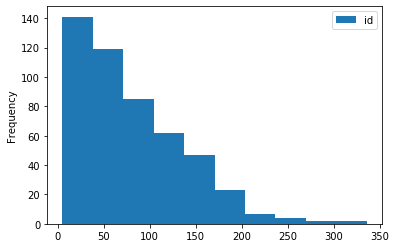

In [290]:
#Посмотрим на распределение назавем их "пропущенных звонков" по пользователям. Оно градиенто стремится к нулю - наибольшее количество - 
# до 30 по 140 абонентам.
df_calls.query('duration == 0').groupby('user_id').agg({'id': 'count'}).plot(kind='hist')

In [291]:
# Для того, чтобы посмотреть, в частности, на распределение нулевых значений по месяцам, создадим переменную "Месяц" сессии -
# в дальнейшем эта переменная понадобится для "склеивания" располагаемых датасетов.
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'])

In [292]:
df_calls.dtypes

id                   object
call_date    datetime64[ns]
duration            float64
user_id               int64
dtype: object

In [293]:
# Создаем переменную "месяц"
df_calls['month'] = df_calls.call_date.dt.month
# Проверяем
df_calls.head(3)

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.00,1000,7
1,1000_1,2018-08-17,0.00,1000,8
2,1000_2,2018-06-11,2.85,1000,6


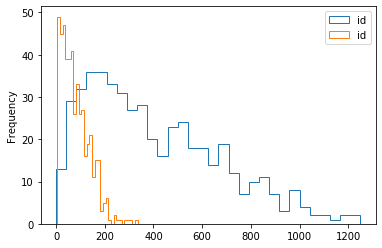

In [294]:
# Посмотрим на распределение количества звонков "пропущенных" и "всех"
ax = df_calls.groupby('user_id').agg({'id': 'count'}).plot(kind='hist', histtype='step', bins=30, range=(0,1250))
df_calls.query('duration == 0').groupby('user_id').agg({'id': 'count'}).plot(kind='hist', histtype='step', bins=30, ax=ax)

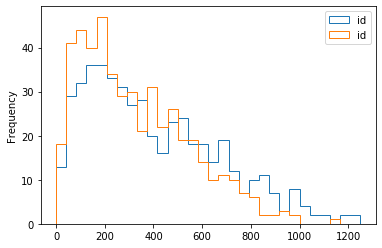

In [295]:
#Посмотрим на распределение звонков с "пропущенными" и без "пропущенных"
ax = df_calls.groupby('user_id').agg({'id': 'count'}).plot(kind='hist', histtype='step', bins=30, range=(0,1250))
df_calls[df_calls['duration'] != 0].groupby('user_id').agg({'id': 'count'}).plot(kind='hist', histtype='step' ,bins=30, range=(0, 1250), ax=ax)

Распределение количества звонков с "пропущенными" и "без" весьма похоже по форме (колебаниям, экстремумам, направлению скошенности - влево). Принимаем решение удалить такие строки, учитывая, что в дальнейшем анализе нас интересуют сгруппированные данные по пользователям и месяцам (а это значит, что даже если в рамках конкретных дней у пользователя 0-е значения по звонкам, но в месяце есть ненулевые - в выборке он останется).

In [296]:
df_calls

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.00,1000,7
1,1000_1,2018-08-17,0.00,1000,8
2,1000_2,2018-06-11,2.85,1000,6
3,1000_3,2018-09-21,13.80,1000,9
4,1000_4,2018-12-15,5.18,1000,12
...,...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499,12
202603,1499_216,2018-10-18,18.83,1499,10
202604,1499_217,2018-11-10,10.81,1499,11
202605,1499_218,2018-10-06,4.27,1499,10


Принимаем решение удалить нулевые значения звонков среди тех пользователей, у которых суммарно в месяц такие значения нулевые, то есть сохраним "пропущенные" звонки в тех месяцах, в которых есть хотя бы одна минута совершенного разговора. Для этого сгруппируем данные по пользователям и месяцам, агрегировав суммарные значения продолжительности телефонных звонков. 

In [297]:
# Перед началом группировки округлим все значения минут вверх до целых чисел, исходя из принципов расчета пользования услугами "Мегалайн" 

In [298]:
df_calls['duration'] = np.ceil(df_calls['duration'])

In [299]:
# Посмотрим, у каких пользователей по месяцам в сумме вышло 0 минут разговора. Таких юзеров 3. Удалим нулевые значения по результату группировки
calls_group = df_calls.groupby(['user_id', 'month'], as_index=False).agg({'duration': 'sum', 'id': 'count'})
calls_group.query('duration == 0')

,user_id,month,duration,id
1493,1240,2,0.0,2
1605,1257,7,0.0,1
1606,1257,8,0.0,2
1607,1257,9,0.0,1
2318,1373,1,0.0,2
2321,1373,4,0.0,1


In [300]:
# Избавляемся от нулевых значений в сумме по месяцам
calls_group = calls_group.query('duration != 0')

In [301]:
calls_group

,user_id,month,duration,id
0,1000,5,159.0,22
1,1000,6,172.0,43
2,1000,7,340.0,47
3,1000,8,408.0,52
4,1000,9,466.0,58
...,...,...,...,...
3169,1498,10,247.0,41
3170,1499,9,70.0,9
3171,1499,10,449.0,68
3172,1499,11,612.0,74


Теперь проверим распределение нулевых значений использованных мб. Интернета

In [302]:
#Удалим колонку с дублированными индексами, возникшую в результате ошибки считывания файла 
df_internet = df_internet.drop(columns='Unnamed: 0')
df_internet

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499
149392,1499_153,490.13,2018-12-14,1499
149393,1499_154,0.00,2018-10-27,1499
149394,1499_155,1246.32,2018-11-26,1499


In [303]:
# Посмотрим, какова доля 0-х значений в использовании Интернет-трафика. 13%
len(df_internet.query('mb_used == 0')) / len(df_internet)

0.13118155773916304

Принимаем решение удалить нулевые значения Интернет трафика среди тех пользователей, у которых суммарно в месяц такие значения нулевые, то есть сохраним 0-е значения трафика в тех месяцах, в которых есть хотя бы один  мб совершенного разговора. Для этого сгруппируем данные по пользователям и месяцам, агрегировав суммарные значения продолжительности телефонных звонков. 

In [304]:
# Прежде округлим все значения в мб использованного Интернет трафика вверх, в соответствии требованиям оператора "Мегалайн"
df_internet['mb_used'] = np.ceil(df_internet['mb_used'])

In [305]:
# Трансформируем переменную дата сессии из object в datetime 
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'])

In [306]:
df_internet.dtypes

id                      object
mb_used                float64
session_date    datetime64[ns]
user_id                  int64
dtype: object

In [307]:
# Создадим переменную месяц сессии, по которой в дальнейшей будет производится группировка данных 
df_internet['month'] = df_internet['session_date'].dt.month

In [308]:
df_internet.head(3)

,id,mb_used,session_date,user_id,month
0,1000_0,113.0,2018-11-25,1000,11
1,1000_1,1053.0,2018-09-07,1000,9
2,1000_2,1198.0,2018-06-25,1000,6


In [309]:
# Проверим, у каких пользователей в сумме 0-е значения использованного интернет трафика по месяцам. 
# Обнаруживаем, что нулевые значения по месяцам у двух пользователей 1094 и 1365  - в отличии пот "пропущенных" 1240. 1257. 1373
internet_group = df_internet.groupby(['user_id', 'month'], as_index=False).agg({'mb_used': 'sum', 'id': 'count'})
internet_group.query('mb_used == 0')

,user_id,month,mb_used,id
592,1094,5,0.0,1
2298,1365,10,0.0,1


In [310]:
# Избавимся от нулевых значений и сохраним в новую сгруппированную переменную срез по трем релевантным столбцам
internet_group = internet_group.query('mb_used != 0')[['user_id', 'month', 'mb_used']]
internet_group

,user_id,month,mb_used
0,1000,5,2256.0
1,1000,6,23257.0
2,1000,7,14016.0
3,1000,8,14070.0
4,1000,9,14581.0
...,...,...,...
3198,1498,10,20604.0
3199,1499,9,1848.0
3200,1499,10,17809.0
3201,1499,11,17984.0


In [311]:
# Создадим переменную количество израсходованных гб трафика, разделив количество мб на 1024  
internet_group['gb_used'] = internet_group['mb_used'] / 1024
internet_group.head(3)

,user_id,month,mb_used,gb_used
0,1000,5,2256.0,2.203125
1,1000,6,23257.0,22.711914
2,1000,7,14016.0,13.687500


In [312]:
#Округлим значения гб вверх до целых, в соответствии с рекомендациями оператора Мегалайн
internet_group['gb_used'] = np.ceil(internet_group['gb_used'])
internet_group.head(3)

,user_id,month,mb_used,gb_used
0,1000,5,2256.0,3.0
1,1000,6,23257.0,23.0
2,1000,7,14016.0,14.0


Закончив с предобработкой данных, приступим к расчету помесячной выручки с каждого пользователя в месяц в соответствии с объемом потребленных услуг и тарифным планом. Для этого нам необходимо "склеить", на данном этапе четыре из пяти располагаемых датасетов: звонки, интернет-трафик, сообщения, информация о тарифном плане каждого пользователя. Для того, чтобы значения столбцов не дублировались, мы склеим подготовленные выше срезы данных: информации о суммарном объеме потребленных услуг в срезе по пользователям и по месяцам. 

In [313]:
# Прежде сгруппируем еще один датасет - сообщения - сгруппировав по пользователям, месяцав, 
# высчитва кол-во сообщений пользователей по месяцам
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'])

In [314]:
df_messages['month'] = df_messages['message_date'].dt.month

In [315]:
messages_group = df_messages.groupby(['user_id', 'month'], as_index=False).agg({'id': 'count'})
messages_group

,user_id,month,id
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


In [316]:
# Для того, чтобы избавиться от колонок с одинаковыми названиями в процессе мерджа, переменуем некоторые столбцы в сводных таблицах
calls_group = calls_group.rename(columns={'duration': 'duration_sum', 'id': 'calls_cnt'})
messages_group = messages_group.rename(columns={'id': 'messages_cnt'})

In [317]:
messages_group

,user_id,month,messages_cnt
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


In [318]:
# Подготовим таблицу с тарифными планами пользователей

In [319]:
df_tariff_plan = df_users[['user_id', 'tariff']]

In [320]:
# Создадим единый датафрейм: соединим таблицу со звонками с таблице использованного Интернет-трафика
# Применим метод merge (outer - для того, чтобы не потерять строки с userid тех пользователей, которые воспользовались лишь одной услугой.)
df_final = calls_group.merge(internet_group, on=['user_id', 'month'], how='outer')

In [321]:
# Добавим в единый датафрейм столбец с количеством сообщений по месяца. 
df_final = df_final.merge(messages_group, on=['user_id', 'month'], how='outer')

In [322]:
# Добавим в единый датафрейм столбец с информацией о тарифном плане пользователя.
df_final = df_final.merge(df_tariff_plan, on='user_id', how='inner')
df_final.head(5)

,user_id,month,duration_sum,calls_cnt,mb_used,gb_used,messages_cnt,tariff
0,1000,5,159.0,22.0,2256.0,3.0,22.0,ultra
1,1000,6,172.0,43.0,23257.0,23.0,60.0,ultra
2,1000,7,340.0,47.0,14016.0,14.0,75.0,ultra
3,1000,8,408.0,52.0,14070.0,14.0,81.0,ultra
4,1000,9,466.0,58.0,14581.0,15.0,57.0,ultra


In [263]:
df_final.isna().sum()

user_id           0
month             0
duration_sum     46
calls_cnt        46
mb_used          13
gb_used          13
messages_cnt    497
tariff            0
dtype: int64

In [325]:
# Пропущенные значения в сводной таблице означают то, что лишь часть пользователей воспользовалась ежемесячно всеми услугами оператора
# Заполним пропущенные значения в переменных - 0
df_final['duration_sum'] = df_final['duration_sum'].fillna(0)
df_final['calls_cnt'] = df_final['calls_cnt'].fillna(0)
df_final['mb_used'] = df_final['mb_used'].fillna(0)
df_final['gb_used'] = df_final['gb_used'].fillna(0)
df_final['messages_cnt'] = df_final['messages_cnt'].fillna(0)

Приступим к подсчету ежемесячной выручки с каждого пользователя в рамках тарифных планов "Смарт" и "Ультра". Так как абонентская плата, лимит на включенную в абонентскую плату пользование услугами, и стоимость единицы сессии услуги сверх лимита - сильно отличаются в двух тарифных планах - создадим сложную функцию, которая принимает на вход значения в единицах той или иной улсгуи по каждому пользователю, и, в случае, если лимит превышен - расчитывает суммарные затраты в месяц на тарифный план, если нет - оставляет абонентскую плату.

In [328]:
# Шаг 1: подготовим сводную таблицу с описанием тарифных планов. Добавим в нее столбец с лимитами в гб Интернета
df_tariffs['gb_per_month_included'] = df_tariffs['mb_per_month_included'] / 1024
df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included
tariff_name,,,,,,,,
smart,50,15360,500,550,200,3,3,15.0
ultra,1000,30720,3000,1950,150,1,1,30.0


In [331]:
# Шаг 2: Создадим функцию, принимающую на вход значения переменной df_final
def month_revenue(row):

    minutes = row['duration_sum']
    messages = row['messages_cnt']
    internet = row['gb_used']
    tariff = row['tariff']

# Допустим, что значения с описанием стоимости тарифного плана хранятся в отдельной таблице, обратимся к ним 
    minutes_lim = df_tariffs.loc[tariff, 'minutes_included']
    message_lim = df_tariffs.loc[tariff, 'messages_included']
    internet_lim = df_tariffs.loc[tariff, 'gb_per_month_included']
    monthly_fee = df_tariffs.loc[tariff, 'rub_monthly_fee']

# Расссчитаем разницу между использованным объемом услуг и лимитом, умножим остаток на стоимость единицы услуги сверх лимита
# при этом, в услугах, лимит которых в месяц пользователем не был исчерпан, будет расчитана лишь абонетская плата.
# функция max возвращает наибольшие значения. Лимит превыше, то число будет положительное, больше нуля. 
# Если превышения нет, то число будет отрицательное и оно нас не интересует.
    call_overlimit = max(minutes - minutes_lim, 0)
    call_overpay = call_overlimit * df_tariffs.loc[tariff, 'rub_per_minute']
    
    message_overlimit = max(messages - message_lim, 0)
    message_overpay = message_overlimit * df_tariffs.loc[tariff, 'rub_per_message']
    
    internet_overlimit = max(internet - internet_lim, 0)
    internet_overpay = internet_overlimit * df_tariffs.loc[tariff, 'rub_per_gb']
    
# Вернем сумму на оплату тарифного плана в месяц
    return monthly_fee + call_overpay + message_overpay + internet_overpay
# В финальном датасете создадим колонку прибыли с каждого пользователя по месяцам
df_final['revenue_per_month'] = df_final.apply(month_revenue, axis = 1)

In [333]:
# Проверим результат отработки функции
df_final.head(5)

,user_id,month,duration_sum,calls_cnt,mb_used,gb_used,messages_cnt,tariff,revenue_per_month
0,1000,5,159.0,22.0,2256.0,3.0,22.0,ultra,1950.0
1,1000,6,172.0,43.0,23257.0,23.0,60.0,ultra,1950.0
2,1000,7,340.0,47.0,14016.0,14.0,75.0,ultra,1950.0
3,1000,8,408.0,52.0,14070.0,14.0,81.0,ultra,1950.0
4,1000,9,466.0,58.0,14581.0,15.0,57.0,ultra,1950.0


## Шаг 3 Проанализируем данные

Теперь мы располагаем сводными данными по пользователям, месяцам, объемом затраченных тарифов в месяц и суммарного дохода с каждого пользователя по месяцам. Обратимся к исследованию поведения пользователей, исходя из выборки: требуемого количества минут и количества звонков в месяц, интернет-траффику и сообщений. Построим и опишем распределения. Рассчитаем моменты статистики: среднее, моду, стандартное отклонение и дисперсию затраченных каждым пользователем в месяц услуг каждого тарифного плана. 

Обратимся к характеристикам распределения минут телефонов переговоров пользователей двух тарифных планов "Смарт" и "Ультра". Для того, чтобы сформировать общее представление о поведении пользователей - сначала посмотрим на распределения средних показателей по месяцам по всем пользователям, затем построим распределения по всем пользователем по каждому месяцу для того, чтобы оценить структуру динамики показателя пользования услугой. 

In [367]:
# Создадим агрегированную таблицу с данными по тарифному плану, месяцу и средним значением сумм минут по месяцам
df_min_calls = df_final.groupby(['tariff', 'month']).agg({'duration_sum': 'mean'})
df_min_calls.head(5)

duration_sum
tariff month              
smart  1        203.852941
       2        298.689655
       3        390.051948
       4        367.133929
       5        387.361702

In [368]:
# Посмотрим на описательную статистику распределения средних значений по месяцам разных тарифных планов
df_min_calls.query('tariff == "smart"')['duration_sum'].describe()

count     12.000000
mean     386.760499
std       72.262004
min      203.852941
25%      382.304759
50%      401.996739
75%      426.754925
max      478.560831
Name: duration_sum, dtype: float64

In [369]:
df_min_calls.query('tariff == "ultra"')['duration_sum'].describe()

count     12.000000
mean     495.934310
std       77.450072
min      297.125000
25%      474.281331
50%      510.552030
75%      542.483250
max      592.805755
Name: duration_sum, dtype: float64

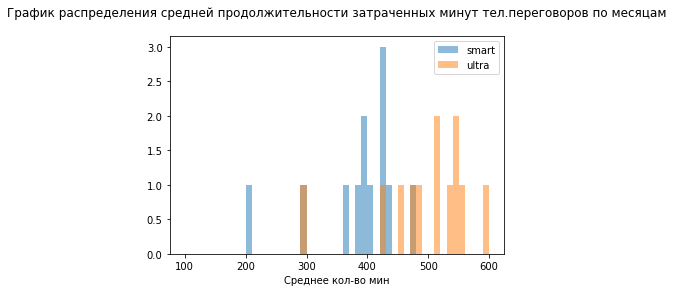

In [370]:
# Построим графики распределения средних значений двух тарифных планов 
ax = plt.hist(x=df_min_calls.query('tariff == "smart"')['duration_sum'], bins=50, range=(100,600), label = 'smart', alpha=0.5)
plt.hist(x=df_min_calls.query('tariff == "ultra"')['duration_sum'], bins=50, range=(100,600), label = 'ultra', alpha=0.5)
plt.xlabel('Среднее кол-во мин')
plt.legend()
plt.title("График распределения средней продолжительности затраченных минут тел.переговоров по месяцам", pad=20);

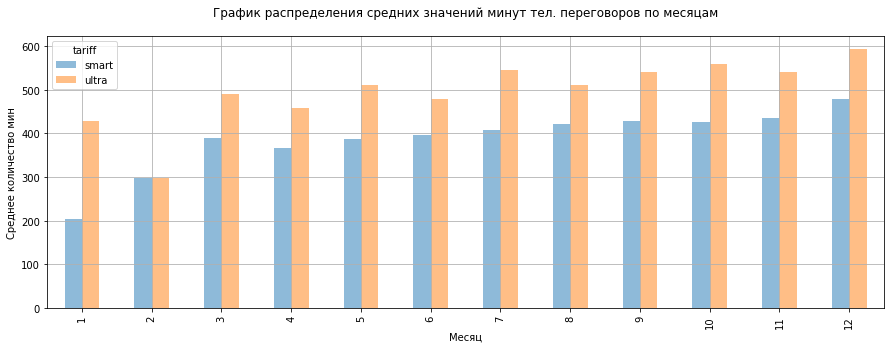

In [381]:
# Построим столбчатую диаграмму распределения средних значений кол-ва минут по месяцам двух тарифных планов
(df_final
 .pivot_table(index='tariff', columns='month', values='duration_sum', aggfunc='mean')
 .T
 .plot(kind='bar', grid=True, figsize=(15, 5), alpha=0.5)
)
plt.xlabel('Месяц')
plt.ylabel('Среднее количество мин')
plt.title("График распределения средних значений минут тел. переговоров по месяцам", pad = 20);

На графиках видно, что клиенты тарифа "Ультра" в среднем тратят большее количество минут, нежели клиенты тарифа "Смарт". Среднее кол-во минут тарифа Ультра - 495 vs. Смарт - 386. Как минимум за полгода значения превышают среднее кол-во минут за весь год среди пользователей обоих тарифных планов.  С увеличением месяца количество затрачиваемых минут клиентами растет в обоих тарифных планах, в феврале 2018 года средние значения примерно равны. Расхождение средних значений тарифных планов по месяцам - мало информативный график - по нему нельзя судить о динамике распределения всех потраченных минут среди всех юзеров по месяам, кроме того, мы не можем судить о распределении дискретных случайных чисел, а также статистических "выбросах" - экстремально высоких и необычно низких значений. наиболее релевантные - непрерывные. Рост числа затраченных минут в месяц также в обоих выборках может объясняться тривиальным увеличением количества пользователей в каждом из месяцяцев, несмотря на незначительный отток пользователей в некоторые из месяцев. Построим графики распределения по всем пользователям суммарного количества минут по месяцам: альтернативная оценка среднее продолжительности в минутах пользования услуги в минутах.  

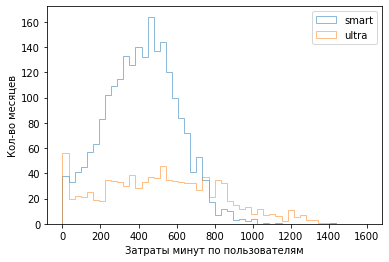

In [392]:
ax = plt.hist(x=df_final.query('tariff == "smart"')['duration_sum'], bins=50, range=(0, 1600), histtype='step', label  = 'smart', alpha=0.5)
plt.hist(x=df_final.query('tariff == "ultra"')['duration_sum'],  bins=50, range=(0, 1600), histtype='step', label = 'ultra', alpha=0.5)
 
plt.ylabel('Кол-во месяцев')
plt.xlabel('Затраты минут по пользователям')
 
plt.legend()

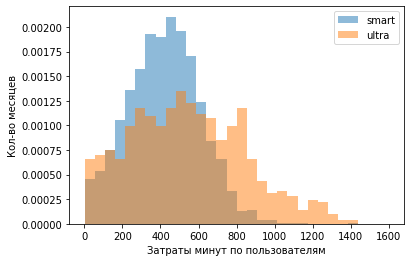

In [393]:
# Построим график распределения плотности (столбчатую диаграмму) суммарного количества минут каждым пользователем в месяц
ax = plt.hist(x=df_final.query('tariff == "smart"')['duration_sum'], bins=30, density=True, range=(1, 1600), label  = 'smart', alpha=0.5)
plt.hist(x=df_final.query('tariff == "ultra"')['duration_sum'],  bins=30, density=True, range=(1, 1600), label = 'ultra', alpha=0.5)
 
plt.ylabel('Кол-во месяцев')
plt.xlabel('Затраты минут по пользователям')
 
plt.legend()

In [ ]:
# Для наглядности оценки формы распределения построим графики *не столбачатые* плотности распределения с апроксимацией 
# - это позволит оценить форму распределения переменной


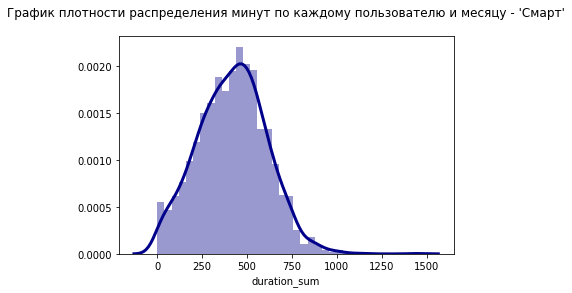

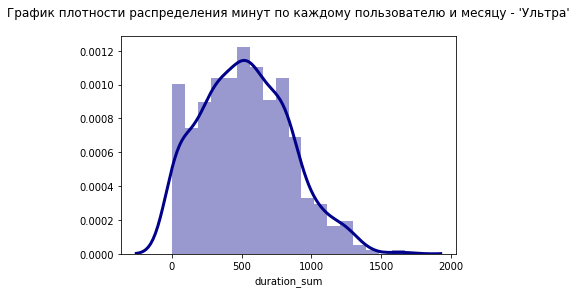

In [394]:
sns.distplot(df_final.query('tariff == "smart"')['duration_sum'], kde = True,
             color = 'darkblue', 
             kde_kws={'linewidth': 3},
             rug_kws={'color': 'black'})
plt.title("График плотности распределения минут по каждому пользователю и месяцу - 'Смарт'", pad = 20)
plt.show()

sns.distplot(df_final.query('tariff == "ultra"')['duration_sum'], kde = True,
             color = 'darkblue', 
             kde_kws={'linewidth': 3},
             rug_kws={'color': 'black'})
plt.title("График плотности распределения минут по каждому пользователю и месяцу - 'Ультра'", pad = 20)
plt.show()


In [461]:
# Посчитаем среднее, дисперсию и стандартное отклонение значений распределения количества-минут каждым пользователем по месяцам 
# тарифа "Смарт"
np.mean(df_final.query('tariff == "smart"')['duration_sum'])

417.9349484073576

In [462]:
np.var(df_final.query('tariff == "smart"')['duration_sum'], ddof=1)

36219.315784344246

In [463]:
np.std(df_final.query('tariff == "smart"')['duration_sum'], ddof=1)

190.3137298892128

In [466]:
# Посчитаем среднее, моду, дисперсию и стандартное отклонение значений распределения количества-минут каждым пользователем по месяцам 
# тарифа "Ультра"
np.mean(df_final.query('tariff == "ultra"')['duration_sum'])

526.6233502538071

In [468]:
np.var(df_final.query('tariff == "ultra"')['duration_sum'], ddof=1)

100873.63339730089

In [469]:
np.std(df_final.query('tariff == "ultra"')['duration_sum'], ddof=1)

317.60609785912624

Из графика видно, что распределение пользовательских минут телефонных переговоров в тарифе Смарт визуально похоже на нормальное, несмотря на то, что несколько скошено влево (даже в ситуации исключения нулей), ввиду наличия эскремально высоких значений. 
Стандартное отклонение кол-ва минут в обоих тарифах достаточно велико. Стандартное отклонение тарифа "Ультра", между тем, в 1.5 раза выше разброса значений кол-ва минут тарифа "Смарт", что говорит о вариативности признака и на что влияют статистические выбросы - экстремально высокие значения.

Построим графики quantile-quantile plot (QQ-Plot) для распредений суммарных значений по пользователю в месяц затраченных минут. QQ-Plot показывает, насколько выборочные значения хорошо соответствуют предсказанным значениям, если бы наше распределение было идеально нормальным. Этот метод - хорошая альтернатива построения гистограмму частот нашего признака, поверх которой наложить кривую идеального нормального распределения (где по оси y будут значения плотности)

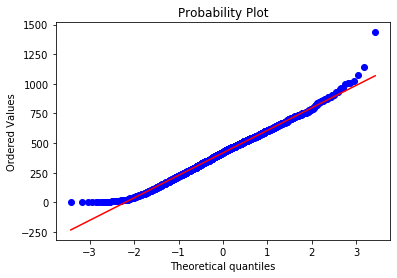

In [403]:
# Построим график QQ-Plot распределения значений по тарифу Смарт
import scipy.stats as stats
stats.probplot(df_final.query('tariff == "smart"')['duration_sum'], dist="norm", plot=plt);

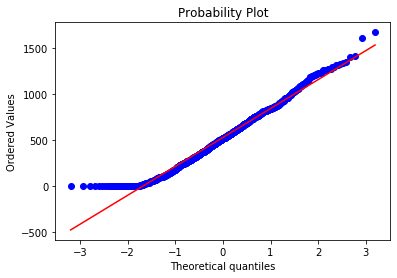

In [402]:
# Построим график QQ-Plot распределения значений по тарифу Ультра
stats.probplot(df_final.query('tariff == "ultra"')['duration_sum'], dist="norm", plot=plt);

Из графиков QQ-Plot становится ясным, что значения распределения в рамках двух тарифных планов сильно выбиваются за границы нормальной апроксимации

In [396]:
# Проведем тест Шапиро-Уилка на нормальность. . Так как нулевая гипотеза в случае Шапиро-Уилка - нормальность распределения, 
# то здесь мы можем сделать вывод, что распределение отклоняется от нормального (в случае, если p_value < 0.05)
stats.shapiro(df_final.query('tariff == "smart"')['duration_sum'])

(0.9939998388290405, 7.081803943265186e-08)

In [397]:
# Проверим распределение минут по тарифу ультра - убедимся, что оно ненормальное
stats.shapiro(df_final.query('tariff == "ultra"')['duration_sum'])

(0.9806316494941711, 3.640921453218482e-10)

Теперь обратимся к построению графиков распределений затраченного Интернет трафика в гб каждым пользователем суммарно в месяц. Сначала построим распределение средних значений, затем всех суммарных значений затраченных гб Интернета по месяцам каждым пользователем.

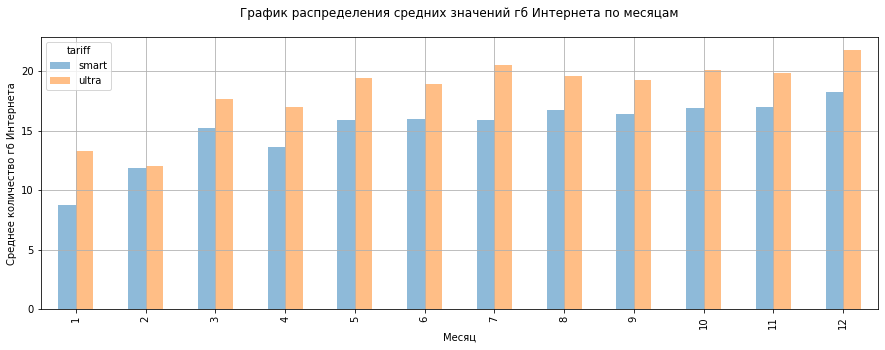

In [499]:
# Построим столбчатую диаграмму распределения средних значений гб Интернет-траффика по месяцам двух тарифных планов
(df_final
 .pivot_table(index='tariff', columns='month', values='gb_used', aggfunc='mean')
 .T
 .plot(kind='bar', grid=True, figsize=(15, 5), alpha=0.5)
)
plt.xlabel('Месяц')
plt.ylabel('Среднее количество гб Интернета')
plt.title("График распределения средних значений гб Интернета по месяцам", pad = 20);

In [412]:
# Посмотрим на описательную статистику затраченного интернет трафика тарифа "Смарт"
df_final.query('tariff == "smart"')['gb_used'].describe()

count    2229.000000
mean       16.359354
std         5.758498
min         0.000000
25%        13.000000
50%        17.000000
75%        20.000000
max        38.000000
Name: gb_used, dtype: float64

In [413]:
# Посмотрим на описательную статистику затраченного интернет трафика тарифа "Ультра"
df_final.query('tariff == "ultra"')['gb_used'].describe()

count    985.000000
mean      19.525888
std        9.865848
min        0.000000
25%       12.000000
50%       19.000000
75%       27.000000
max       49.000000
Name: gb_used, dtype: float64

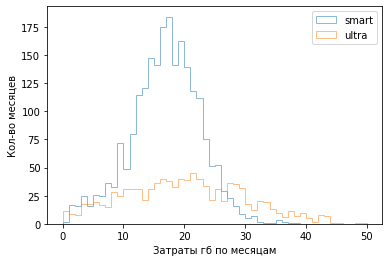

In [420]:
# Обратимся к распределению количества гб, гатраченных пользователей каждого тарифного плана суммарно по месяцам
ax = plt.hist(x=df_final.query('tariff == "smart"')['gb_used'], bins=50, range=(0, 50), histtype='step', label  = 'smart', alpha=0.5)
plt.hist(x=df_final.query('tariff == "ultra"')['gb_used'],  bins=50, range=(0, 50), histtype='step', label = 'ultra', alpha=0.5)
 
plt.ylabel('Кол-во месяцев')
plt.xlabel('Затраты гб по месяцам')
 
plt.legend()

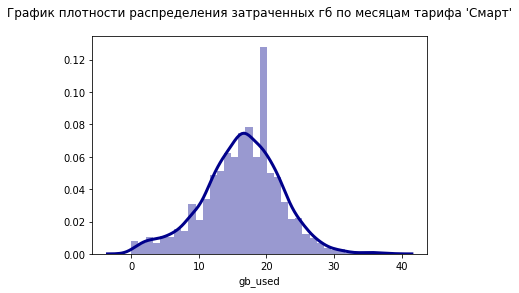

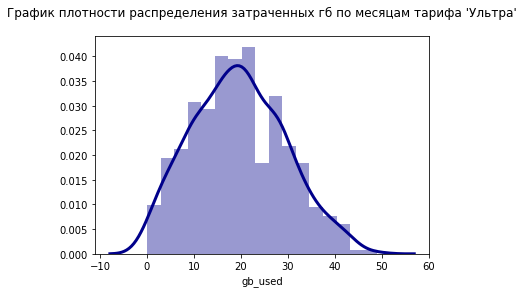

In [422]:
sns.distplot(df_final.query('tariff == "smart"')['gb_used'], kde = True,
             color = 'darkblue', 
             kde_kws={'linewidth': 3},
             rug_kws={'color': 'black'})
plt.title("График плотности распределения затраченных гб по месяцам тарифа 'Смарт'", pad = 20)
plt.show()

sns.distplot(df_final.query('tariff == "ultra"')['gb_used'], kde = True,
             color = 'darkblue', 
             kde_kws={'linewidth': 3},
             rug_kws={'color': 'black'})
plt.title("График плотности распределения затраченных гб по месяцам тарифа 'Ультра'", pad = 20)
plt.show()

In [470]:
# Посчитаем среднее, дисперсию и стандартное отклонение значений распределения количества-минут каждым пользователем по месяцам 
# тарифа "Смарт"
np.mean(df_final.query('tariff == "smart"')['gb_used'])

16.35935397039031

In [471]:
np.var(df_final.query('tariff == "smart"')['gb_used'])

33.14542730808315

In [472]:
np.std(df_final.query('tariff == "smart"')['gb_used'])

5.7572065542312405

In [473]:
# Посчитаем среднее, дисперсию и стандартное отклонение значений распределения количества-минут каждым пользователем по месяцам 
# тарифа "Ультра"
np.mean(df_final.query('tariff == "ultra"')['gb_used'])

19.525888324873097

In [474]:
np.var(df_final.query('tariff == "ultra"')['gb_used'])

97.23613182509222

In [475]:
np.std(df_final.query('tariff == "ultra"')['gb_used'])

9.860838292208843

Из графиков плотности распределения по двум тарифным планом можно сделать вывод, что распределение гб тарифа "Смарт в большей степени напоминает нормальное, но несколько скошено вправо (к увеличению). Распредение использованного трафика клиентов "Ультра" напоминает - равномерное - оно не нормальное, скошенное и имеет несколько мод. 
Среднее количество использованных пользователями гю Интернета тарифа "Ультра" предсказуемо выше (19.5), нежели тарифа "Смарт" (16.3) - но разница не велика. Это обусловлено тем, что лимит Интернета тарифа "Ультра" выше. В то же время, стандартное отклонение тарифа "Ультра" - 10 гб, также выше, чем тарифа "Смарт" - 5.7., несмотря на меньший объем выборки, что говорит о том, что несмотря на больший лимит, вариативность в пользовании Интернета тарифа "Ультра" выше, чем у "Смарт".

Построим графики quantile-quantile plot (QQ-Plot) для распредений суммарных значений по пользователю в месяц затраченных гб Интернета.

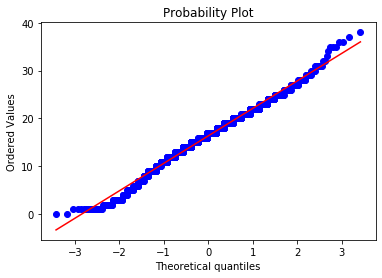

In [423]:
stats.probplot(df_final.query('tariff == "smart"')['gb_used'], dist="norm", plot=plt);

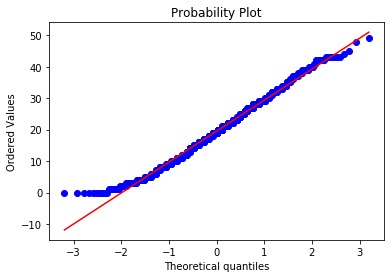

In [424]:
stats.probplot(df_final.query('tariff == "ultra"')['gb_used'], dist="norm", plot=plt);

In [425]:
# Применим статистический тест Шапиро-Уилка на нормальность обоих распределений
stats.shapiro(df_final.query('tariff == "smart"')['gb_used'])

(0.9903444647789001, 4.645301504568877e-11)

In [426]:
stats.shapiro(df_final.query('tariff == "ultra"')['gb_used'])

(0.9891210794448853, 1.1099849643869675e-06)

Исходя из значений тестов мы можем оконочательно убедиться в том, что распределения не нормальные. На графиках QQ-plot видно, что ввиду статистических выбросов распределение выходят за пределы апроксимации нормального распределения. Из гравика гистограммы распределения мы можем сделать вывод, что несмотря на наибольший бесплатный лимит по трафику Интернета тарифа "Ультра" (30 гб vs. 15 гб в Смарте) - львинная доля пользователей этого тарифного плана пользуется тем же объемом интернет трафика, что и пользователи тарифа "Смарт" (больше всего пользователей обоих тарифных планах тратят в районе 18 гб.)

In [ ]:
Обратимся к распределению суммарного количества сообщений по каждому пользователю в месяц обоих тарифных планов.

In [450]:
# Посмотрим на распределение средних значений для того, чтобы оценить общую картину
df_messages_used = df_final.groupby(['tariff', 'month']).agg({'messages_cnt': 'mean'})

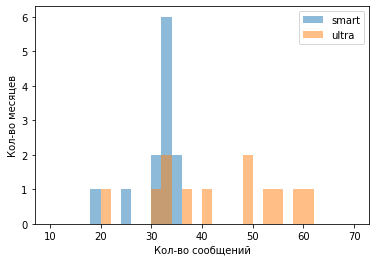

In [452]:
# Построим график распределения средних значений по месяцам
ax = plt.hist(x=df_messages_used.query('tariff == "smart"')['messages_cnt'], bins=30, range=(10,70), label = 'smart', alpha=0.5)
plt.hist(x=df_messages_used.query('tariff == "ultra"')['messages_cnt'], bins=30, range=(10,70), label = 'ultra', alpha=0.5)

plt.ylabel('Кол-во месяцев')
plt.xlabel('Кол-во сообщений')

plt.legend()

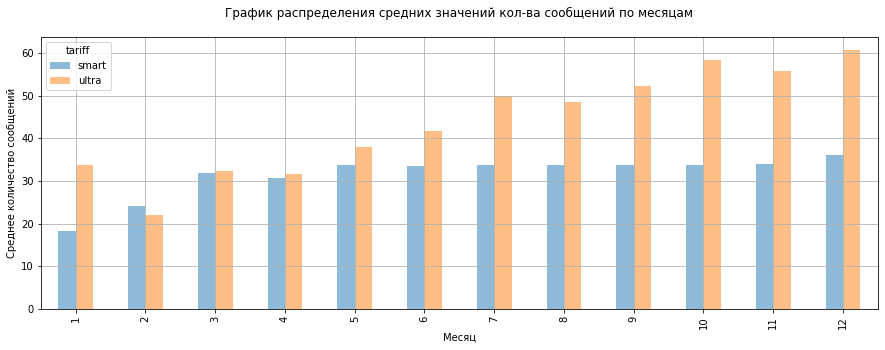

In [453]:
# Построим столбчатую диаграмму распределения средних значений кол-ва сообщений по месяцам двух тарифных планов
(df_final
 .pivot_table(index='tariff', columns='month', values='messages_cnt', aggfunc='mean')
 .T
 .plot(kind='bar', grid=True, figsize=(15, 5), alpha=0.5)
)
plt.xlabel('Месяц')
plt.ylabel('Среднее количество сообщений')
plt.title("График распределения средних значений кол-ва сообщений по месяцам", pad = 20);

Из графика распределений средних значений количества отправленных сообщений по месяцам мы можем сделать следующий выводы. 1. В среднем, пользователи тарифа "Ультра" отправляют (местами в разы) больше сообщений, нежели клиенты тарифа "Смарт". Разрыв увеличивается в течение года. 2. Распределение среднего количества сообщений в месяц по месяцам у тарифа "Ультра" - равномерное, в то время как у тарифа "Смарт" - уверенный рост количества отправленных сообщений в течение года. 

Обратимся к распределению суммарного количества отправленных сообщений в кажды месяц каждым клиентом обоих тарифных планов.

In [432]:
# Посмотрим на описательную статистику затраченного интернет трафика тарифа "Смарт"
df_final.query('tariff == "smart"')['gb_used'].describe()

count    2229.000000
mean       16.359354
std         5.758498
min         0.000000
25%        13.000000
50%        17.000000
75%        20.000000
max        38.000000
Name: gb_used, dtype: float64

In [434]:
# Посмотрим на описательную статистику затраченного интернет трафика тарифа "Ультра"
df_final.query('tariff == "ultra"')['gb_used'].describe()

count    985.000000
mean      19.525888
std        9.865848
min        0.000000
25%       12.000000
50%       19.000000
75%       27.000000
max       49.000000
Name: gb_used, dtype: float64

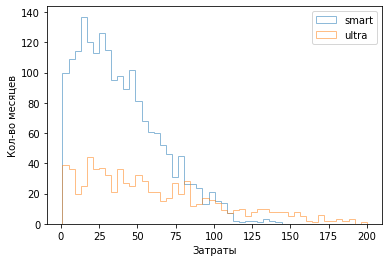

In [429]:
# Построим распределение количества отправленных сообщений суммарно за каждый месяц клиентов двух тарифных планов 
ax = plt.hist(x=df_final.query('tariff == "smart"')['messages_cnt'], bins=50, range=(1,200), histtype='step', label  = 'smart', alpha=0.5)
plt.hist(x=df_final.query('tariff == "ultra"')['messages_cnt'],  bins=50, range=(1,200), histtype='step', label = 'ultra', alpha=0.5)
 
plt.ylabel('Кол-во месяцев')
plt.xlabel('Количество сообщений')
 
plt.legend()

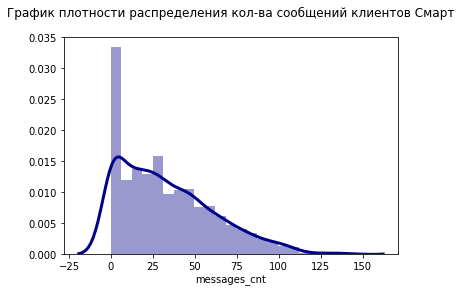

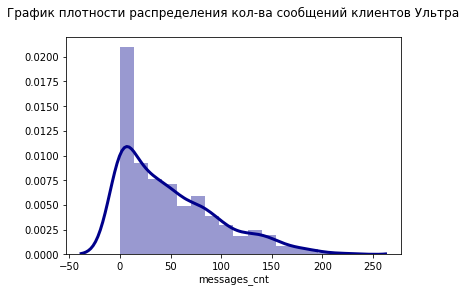

In [430]:
# Построим графики плотности распределения кол-ва сообщений клиентов двух тарифных планов
sns.distplot(df_final.query('tariff == "smart"')['messages_cnt'], kde = True,
             color = 'darkblue', 
             kde_kws={'linewidth': 3},
             rug_kws={'color': 'black'})
plt.title("График плотности распределения кол-ва сообщений клиентов Смарт", pad = 20)
plt.show()

sns.distplot(df_final.query('tariff == "ultra"')['messages_cnt'], kde = True,
             color = 'darkblue', 
             kde_kws={'linewidth': 3},
             rug_kws={'color': 'black'})
plt.title("График плотности распределения кол-ва сообщений клиентов Ультра", pad = 20)
plt.show()

In [476]:
# Посчитаем среднее, дисперсию и стандартное отклонение значений распределения количества отправленных сообщений пользователем по месяцам 
# тарифа "Смарт"
np.mean(df_final.query('tariff == "smart"')['messages_cnt'])

33.384028712427096

In [477]:
np.var(df_final.query('tariff == "smart"')['messages_cnt'])

796.455482917076

In [478]:
np.std(df_final.query('tariff == "smart"')['messages_cnt'])

28.221542886898938

In [479]:
# Посчитаем среднее, дисперсию и стандартное отклонение значений распределения количества отправленных сообщений пользователем по месяцам 
# тарифа "Ультра"
np.mean(df_final.query('tariff == "ultra"')['messages_cnt'])

49.36345177664975

In [480]:
np.var(df_final.query('tariff == "ultra"')['messages_cnt'])

2282.946075394891

In [481]:
np.std(df_final.query('tariff == "ultra"')['messages_cnt'])

47.7801849661017

Исходя из гистограм распределения количества сообщений обоих таривных планов и описательной статистики - можно сделать вывод, что несмотря на разность лимитов, определяющих тарифные планы по этой категории - большая часть клиентов тарифа "Ультра" отправляет +- столько же сообщений, сколько клиенты тарифа "Смарт". Однако, как в среднем, так и в целом по динамике, клиенты тарифа "Ультра" отправляют сообщений несколько больше, нежели клиенты тарифа "Смарт", что контр-интуитивно, принимая во внимание объемный лимит Интернет-трафика и телефонных переговоров в рамках тарифного плана "Ультра".
Что же касается графиков плотности распределения двух тарифных планов этой переменной, то можно сказать - что графики скошены влево - градиентно слижаются к нулю с увеличением суммы отправленных сообщений. График тарифа "Ультра" напоминает - экспоненциальное распределение. Тест на нормальность в данной ситуации кажется излишним.

Среднее количество отправленных сообщений пользователями тарифа "Смарт" ниже, чем тарифа "Ультра (28 vs. 49). Вариативность этого признака у тарифа "Ультра" выше, чем у тарифа "Смарт (+- 47.8 vs. +- 28.2)

In [ ]:
Проведем анализ распределения стоимости по пользователям за каждый месяц. 

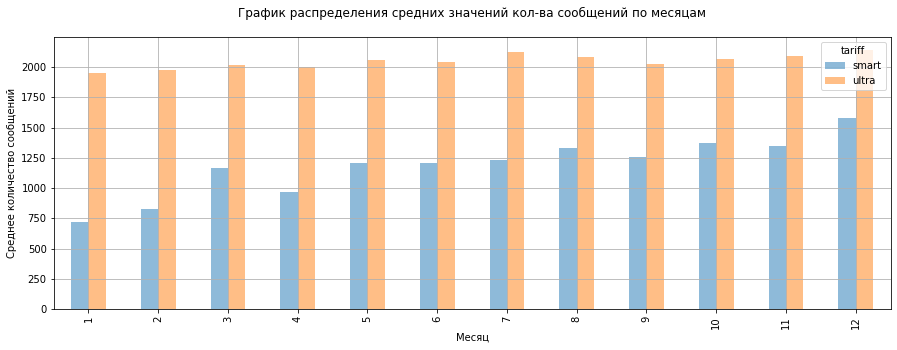

In [497]:
# Выведем стобчатый график, демонстрирующий динамику средних значений выручки по месяцам обоих тарифных планов.
(df_final
 .pivot_table(index='tariff', columns='month', values='revenue_per_month', aggfunc='mean')
 .T
 .plot(kind='bar', grid=True, figsize=(15, 5), alpha=0.5)
)
plt.xlabel('Месяц')
plt.ylabel('Среднее количество сообщений')
plt.title("График распределения средних значений кол-ва сообщений по месяцам", pad = 20);

Из графика можно сделать вывод, что, если значения средней выручки по месяцам тарифа "Ультра" распределены равномерно, то выручка тарифа "Смарт" с незначительными колебаниями плавно растет от месяца к месяцу.

In [446]:
# Выведем описательную статистику распределения затрат на тарифный план "Смарт"
df_final[df_final['tariff'] == 'smart']['revenue_per_month'].describe()

count    2229.000000
mean     1294.639300
std       820.933202
min       550.000000
25%       550.000000
50%      1038.000000
75%      1750.000000
max      6770.000000
Name: revenue_per_month, dtype: float64

In [447]:
# Выведем описательную статистику распределения затрат на тарифный план "Ультра"
df_final[df_final['tariff'] == 'ultra']['revenue_per_month'].describe()

count     985.000000
mean     2071.065990
std       378.802377
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      1950.000000
max      4800.000000
Name: revenue_per_month, dtype: float64

Text(0, 0.5, 'Частотность')

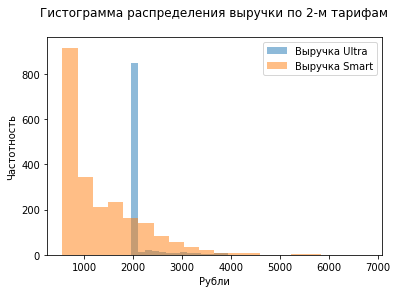

In [443]:
# Построим гистограммы распределения пользовательских затрат на оба тарифных плана 
ax = df_final[df_final['tariff'] == 'ultra'].plot(kind='hist', y='revenue_per_month', label='Выручка Ultra', alpha=0.5, bins=20)
df_final[df_final['tariff'] == 'smart'].plot(kind='hist', y='revenue_per_month', label='Выручка Smart', ax=ax, alpha=0.5, bins=20)

plt.title('Гистограмма распределения выручки по 2-м тарифам'+ "\n")
plt.xlabel('Рубли')
plt.ylabel('Частотность')

Из описной статистики и графиков мы можем сделать следующие выводы. Во-первых, предсказуемо, пользователи тарифного плана "Смарт", несмотря на низкую абонентскую плату, но ввиду также низких включенных в стоимость лимитов на услуги, переплачивают за тариф чаще, нежели пользователи более дорого и объемного по лимитам тарифа "Ультра". Так, как минимум у 50% пользователей тарифа "Смарт" стоимость абонентской платы превышает 550 руб. (между 25 и 75 процентилями - плата от 1000 до 1700 рублей - что в 2/3 раза выше абонентской платы, в то время как с тарифом "Ультра" пользователи в 75% случаев не переплачивают за тариф. Во-вторых, в случае с тарифом "Смарт", объем переплат после значений абнентской платы градиентно стремится к нулю - что напоминает экспоненскийальное снижение. В случае тарифа "Ультра" - падение в количестве переплативших абонентскую плату пользователей более драматично, но все количество переплат также представлено - что говорит о чрезвычайной выгоде данного тарифного плата, пользователи которого платят почти в 4 раза выше абонентскую плату, чем пользователи тарифа "Смарт", но все же, пусть в незначительном объеме, но переплачивают.

Для того, чтобы сравнить, отличаются ли статистически достоверно средние вырочки по всем пользователям и по месяцам двух тарифных планов, проведем t-тест (критерий Стьюдента) сравнения средних двух независимых выборок (тарифа "Смарт" и "Ультра").   

## Промежуточный вывод

В данном разделе мы проанализировали распределения значений трех ключевых услуг двух тарифных планов: кол-во израсходованных минут, Интернет трафика, количества сообщений по месяцам.
Сначала мы оценили распрделение средних значений по каждому из 12 месяцев данных показателей, чтобы оценить общую динамику. Затем мы построили и проанализировали распределения всех значений в срезе по пользователю для того, чтобы оценить моменты схожести и расхождения распределений в динамике (непрерывной переменной).
Итак, общим принципом всех параметров тарифного плана является то, что количество затраченного объема услуг с месяцами растет (в течение года). 
Что касается затраченных минут разговора, то средние значения растут в большей степени в тарифе "Смарт", нежели "Ультра". В среднем, предсказуемо, клиенты тарифа "Ультра" тратят на телефонные переговоры времени больше, чем в тарифе "Смарт". Лишь в Феврале 2018 года средние значения сравнялись. Любопытно, что при этом, исходя из гистограммы распределения значений по пользователям, бОльшая доля пользователей тарифа "Ультра" тратит примерно столько же, сколько большая часть пользователей тарифа "Смарт" (примерно от 100 до 650 минут). При это значения кол-ва затраченных пользователем минут тарифа "Ультра" распределены на всем интервале более менее равномерно - блазировано - о чем свидетельствует также довольно высокое стандартное отклонение этого показателя по тарифу. Это контринтуинтивно ввиду того обстоятельства, что лимиты на минуты тарифного плана "Ультра" существенно выше включенных в стоимость абонентской платы тарифа "Смарт. Также интерес вызывает тот факт, что распределение даже с наличием статистических выбросов минут тарифа "Смарт" выглядит визуально нормальным - унимодальным и симметричным (то есть очень похоже на форму колокольчика Гаусса). Мы допускаем, что если избавиться от 0 и экстремально высоких значений, индекс теста Шапиро-Уилка не позволил бы нам отклонить нулевую гипотезу о нормальности распределения. Это значит, что пик значений тарифа "Смарт" приходится на 400-500 минут, а значений меньше/ больше симметрично меньше.

Что же касается средних значений затраченного Интернет-трафика по месяцам, то в обоих тарифных планах в течении года они подвержены общей динамики роста с небольшими снижениями по месяцам. В среднем, пользователи "Ультра" тратят больше гб Интернета, нежели клиенты тарифа "Смарт" (однако расхождение очень относительное - примерно в 3 гб.). Также в феврале 2018 года среднее количество затраченных гб Интернет-трафика сравнялось. Любопытно, что, как и в случае с минутами тел. переговоров, бОльшая часть клиентов тарифа "Ультра" используют примерно столько же интернет-трафика, сколько бОльшая часть клиентов тарифа "Смарт" (примерно от 9 до 26 гб.), несмотря на то, что лимит Интернет-трафика тарифа "Ультра" в 2 раза выше лимита тарифа "Смарт". Распределение затраченных гб Интернета тарифа "Ультра" равномерное, многомодальное, блазированное (с одинаковой частотой встречаются значения экстремально низкие и довольно высокие) - это объясняется очень лояльными (либеральными) условиями тарифного плана Ультра (30 гб Интернета, включенного в пакет). Между тем, интерес вызывает  распределение затраченных гб тарифного плана "Смарт" - оно также очень похоже на нормальное, как и распределение минут этого тарифного плана, хоть таковым по тесту Шапиро-Уилка не является - с пиком в районе 18 гб. В обоих распределениях представлены экстремальные значения в 38 гб (тариф Смарт при лимите в 15 гб) и 49 гб (тариф Ультра при лимите в 30 гб).

Не менее интересная ситуация и с распределениями количества сообщений. Исходя из графика распределения средних значений по месяцам, мы можем сделать вывод, что, в случае с Смарт значения распределены равномерно по месяцам (в районе 32), в то время как у тарифа Ультра в течение года наблюдается уверенный рост этого показателя. В среднем же пользователи тарифа Ультра отправляют больше сообщений, чем пользователи тарифа "Смарт. между тем, исходя из гистограмм распределения суммарных значений кол-ва сообщений по месяцам по каждому пользователю - мы можем сделать вывод - что в рамках обоих тарифных планов с ростам этого показателя - кол-во пользователей снижается.Как и для других услуг, для сообщений характерно следующей свойство: бОльшая часть клиентов тарифа "Смарт" пользуется примерно таким же количеством сообщений, как и кленты "Ультра" (примерно от 20 до 100). Распределение знаения в тарифе "Ультра" блазированное, в тарифе "Смарт" несколько напоминает экспоненциальное снижение, или распределение Пуассона.

Дополнительно в качестве предподготовки к t-тестам мы проанализировали распределения выручки по месяцам от каждого клиента обоих тарифных планов. Исходя из описательной статистики и гистограмм распределения мы можем сделать следующие выводы. В большей степени переплачивают абонентсткую плату клиенты тарифа "Смарт" более 50% пользователей платят от 1000 до 6700 руб. (лишь 25 % не переплачивают) - из-за менее лояльных условий тарифного плана. В то время как пользователи тарифного плана "Ультра" очень редко переплачивают тарифную ставку, которая, в то же время, довольно высокая (75% не переплачивают, переплата даже при высокой стоимости тарифа есть до почти 5 т.руб.). Из переплаты наиболее представлены по выборке выплаты в районее 1000 руб. и 1750 руб (смарт), 2200 руб. (ультра).

## Сравнение средних двух независимых выборок (t-тест)

In [436]:
from scipy import stats as st

На данном этапе мы располагаем двумя средними значениями двух независимых совокупностей (выборок). Тариф "Смарт": около 1295 руб., Тариф "Ультра": около 2071 руб. Благодаря этому тесту и выборкам мы будем оценивать средние двух генеральных совокупностей, то есть дадим ответ, отличается ли статистически достоверно ежемесячная выручка от пользователей тарифа "Смарт" и "Ультра". Тем самым, дадим ответ, какой же все-таки тариф выгоднее. Для этого применим t-тест на сравнение на проверку гипотезы о равенстве средних двух генеральных совокупностей  (на основе независимых выборок). 

Правильнее будет сказать, что мы используем t - распределение не потому что у нас маленькие выборки, а потому что мы не знаем стандартное отклонение в генеральной совокупности. Поэтому в дальнейшем стоит использовать t - распределение для проверки гипотез, если нам неизвестно стандартное отклонение в генеральной совокупности, необходимое для расчета стандартной ошибки, даже если объем выборки больше 30.

Перед тем, как применять t-тест, нужно учесть два входных требования:
    а) Требование гомогенности дисперсии (дисперсии внутри групп должны быть примерно одинаковы)
    б) Если объем выборки недостаточно большой (меньше 30 - граница объема выборки весьма условная, но конвенциональная!), то важно соблюдать требование о нормальности распределения двух выборок.
Отработаем эти требования:
    а) Исходя из характеристик стандартного отклонения в описательной статистике по выручке, мы можем сделать вывод, что дисперсии двух выборок отличаются. Поэтому в самом t-тесте отметим неравенство дисперсий. 
    б) В наших выборках количество наблюдений сильно больше 30. Если наблюдений больше 30, то t-тест неплохо справляется с поставленной задачей даже если распределение внутри выборок отличается от нормального.

Теперь установим границы доверительного интервала, обозначив увроень значимости (p_value) = 0.05. Если значений p_value средних двух выборок будет лежать за границей 95% доверительного интервала, мы отклоним нулевую гипотезу о равенстве средних, в противном случае - опровергнуть не сможем. Значение p_value - момент критический. Принимая решение о значении p_value мы руководствуемся стремлением избежать ошибки 1-го (отклонили нулевую гипотезу, когда на самом деле она была верна) и 2-го рода (не отклонили нулевую гипотезу, хотя верна была альтернативная).

Предельно артекулируем нулевую и альтернативную гипотезу
H0: Средние значения ежемесячной выручки тарифов "Смарт" и "Ультра" не различаются (т.е. средние значение равны!)
H1: Средние значения ежемесячной выручки тарифов "Смарт" и "Ультра" различаются (т.е. средние значения не равны!)

In [454]:
# Выведем результат t-теста
sample_1 = df_final[df_final['tariff'] == 'ultra']['revenue_per_month'] 
sample_2 = df_final[df_final['tariff'] == 'smart']['revenue_per_month'] 
results = st.ttest_ind(sample_1, sample_2, equal_var = False)
alpha = 0.05

print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('Принимаем альтернативную гипотезу')
else:
    print('Опровергнуть нулевую гипотезу нельзя')

p-значение:  2.7240946993530856e-246
Принимаем альтернативную гипотезу


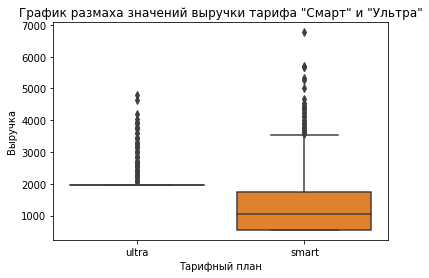

In [489]:
sns.boxplot(x = 'tariff', y = 'revenue_per_month', data = df_final)
plt.title('График размаха значений выручки тарифа "Смарт" и "Ультра"')
plt.xlabel('Тарифный план')
plt.ylabel('Выручка');

Итак, средние значения ежемесячной выручки в тарифе "Смарт" и "Ультра" статистически достоверно различаются, что говорит нам в срезе данных о том, что средняя выручка тарифа "Ультра" выше выручки тарифа "Смарт". График boxplot не очень наглядный, ввиду того, что значения выручки тарифа "Ультра" до 75 % (процентиля) не превышают стоимость таривного плана. Между тем , по нему видно, что медиана тарифа "ультра" выходит за пределы 75 -го процентиля тарифа "Смарт", в то время как значения вариативного признака тарифа "Ультра" выходит за пределы 1.5 межквартильных размаха значений выручки тарифа "Смарт".

Теперь обратимся сравнению средних значений выручки по Москве и другим города РФ по двум тарифным планам. Для этого нам необходимо добавить в финальную таблицу переменную с характеристиками клиентов: город. 

In [456]:
# Смерджим агрегированную таблицу с таблицей данных о городе, возрасте, дате регистрации
df_final_general = df_final.merge(df_users, on='user_id', how='left')
df_final_general.head(5)

,user_id,month,duration_sum,calls_cnt,mb_used,gb_used,messages_cnt,tariff_x,revenue_per_month,age,churn_date,city,first_name,last_name,reg_date,tariff_y
0,1000,5,159.0,22.0,2256.0,3.0,22.0,ultra,1950.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6,172.0,43.0,23257.0,23.0,60.0,ultra,1950.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7,340.0,47.0,14016.0,14.0,75.0,ultra,1950.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8,408.0,52.0,14070.0,14.0,81.0,ultra,1950.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9,466.0,58.0,14581.0,15.0,57.0,ultra,1950.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


Сформулируем нулевую и альтернативную гипотезы.
H0: средняя ежемесячная выручка от обоих тарифных планов "Смарт" и "Ультра" клентов из г.Москва не отличается от средней ежемесячной выручки клентов из других городов (т.е. средние значения равны)
H1: средняя ежемесячная выручка от обоих тарифных планов "Смарт" и "Ультра" клентов из г.Москва отличается от средней ежемесячной выручки клентов из других городов (т.е. средние значения не равны)

In [457]:
# Проведем t-тест на уровне значимости 0.05 (p_value)
sample_1 = df_final_new[df_final_new['city'] == 'Москва']['revenue_per_month'] 
sample_2 = df_final_new[df_final_new['city'] != 'Москва']['revenue_per_month'] 
results = st.ttest_ind(sample_1, sample_2, equal_var = False)
alpha = 0.05

print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('Принимаем альтернативную гипотезу')
else:
    print('Опровергнуть нулевую гипотезу нельзя')

p-значение:  0.5126564657748214
Опровергнуть нулевую гипотезу нельзя


Таким образом, исходя из данных t-теста, мы, контр-интуитивно, статистически достоверно не можем утверждать о том, что средние выручки по Москве и других городам по обоим тарифным планам отличаются, следовательно, выручка блазированная.

## Общий вывод


Технические рекомендации.
В рамках проведения t-тестов я бы предложил избавиться от статистических выбросов как на этапе оценки распределения количественных характеристик услгу, так и на этапе сравнения средних значений выручки двух генеральных совокупностей (по выборкам) тарифов "Смарт" и "Ультра". Распределение Стьюдента требует нормального распределения выборок (когда среднее и дисперсия генеральной совокупности неизвестна). Более того, статистические выбросы (экстремально высокие значения) сильно влияют на такие моменты статистики как среднее, дисперсию и стандартное отклонение, искажая интерпретацию вариативности значений переменных. 
Также в рамках оценки распределения значений затраченного объема услуг обоих операторов - наше предложение смотреть на распределения без пропущенных значений, маркированных нулями. Это позволит более точно оценить характер распределения велечин.

В оценке сравнения средних значений выручки по Москве и другим городам, мы предлагаем укрупить группы: Москва и Московская область в качестве единой городской агломерации, также по другим крупным городам субъектов. Это позволит более взвешенно оценить средние значения показателей и поможет предотвратить ошибку второго рода (не отклонить нулевую гипотезу о равенстве средних, в то время как верна альтернативная). В наших выборках Москва, Балашиха и Химки, например, представлены как разные города. 

В рамках дальнейшего анализа мы предлагаем оценить влияние фактора возраста на выручку в рамках обоих тарифных планов "Смарт" и "Ультра". Для этого мы предлагаем посмотреть на примерное разбиение клиентов по возрастным группам (в тамках каждого тарифного плана по степени насыщенности методом qcut - ввиду ненормальности распределений). Далее сгруппировать значений прибыли по возрастным группам в каждом тарифном плане. После этого мы предлагаем применить однофакторный дисперсионный анализ ANOVA (f-критерий Фишера) для тарифа "Смарт" и "Ультра". 